In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# I/O
seg = pd.read_parquet(os.path.join(os.getcwd(), 'input/CRC-097_clean_cylinter_clustering_3d_leiden.parquet'))
main = pd.read_csv(os.path.join(os.getcwd(), 'input/main.csv'))

out = os.path.join(os.getcwd(), 'output/cluster_frequency')
if not os.path.exists(out):
    os.makedirs(out)

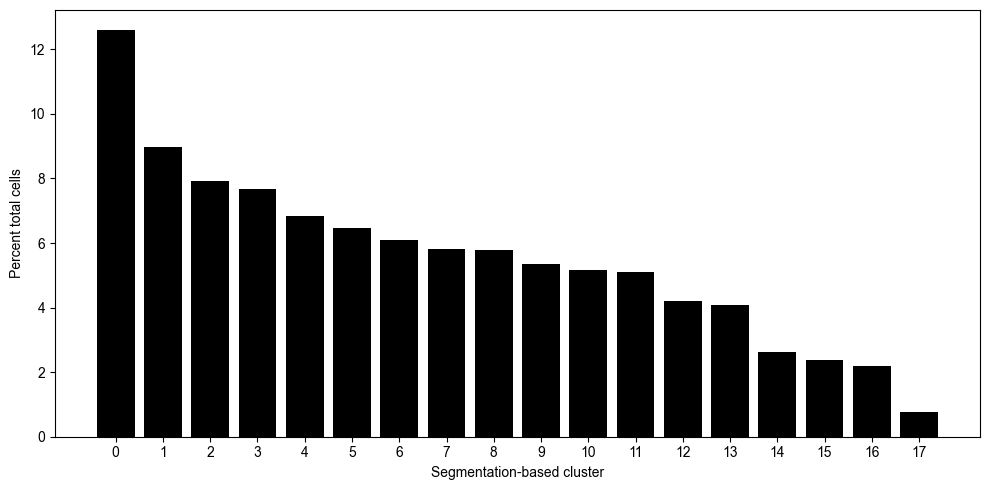

cluster_3d
0     12.588722
1      8.987291
2      7.917321
3      7.663800
4      6.833301
5      6.474979
6      6.101046
7      5.819634
8      5.781335
9      5.347561
10     5.159606
11     5.106321
12     4.219206
13     4.069029
14     2.614615
15     2.368588
16     2.181257
17     0.766390
Name: cluster_3d, dtype: float64


In [3]:
# plot segmentation-based cluster frequency (before class balancing)

plt.rcParams['font.family'] = 'Arial'
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(
    x=seg.groupby('cluster_3d')['cluster_3d'].size().sort_values(ascending=False).index.astype('str'),
    height=(seg.groupby('cluster_3d')['cluster_3d'].size().sort_values(ascending=False) / len(seg)) * 100, color='k'
)

plt.xlabel('Segmentation-based cluster')
plt.ylabel('Percent total cells')
plt.tight_layout()

plt.show()
fig.savefig(os.path.join(out, 'segmentation_full.pdf'))
plt.close('all')

cluster_freq = (seg.groupby('cluster_3d')['cluster_3d'].size().sort_values(ascending=False)/seg.groupby('cluster_3d')['cluster_3d'].size().sort_values(ascending=False).sum())*100
print(cluster_freq)

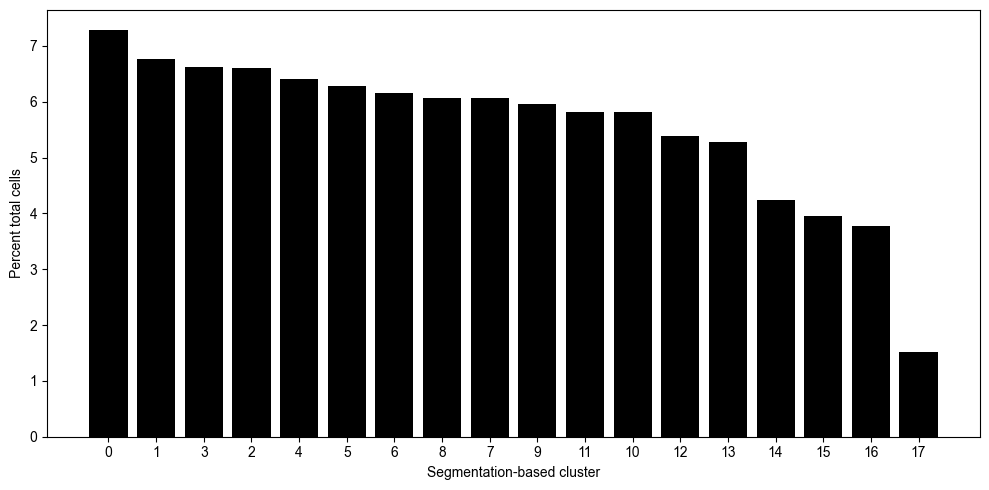

Seg
0     7.280139
1     6.761456
3     6.615348
2     6.604286
4     6.415389
5     6.275125
6     6.152186
8     6.074749
7     6.069948
9     5.964750
11    5.821356
10    5.808624
12    5.384702
13    5.288271
14    4.233372
15    3.960150
16    3.766662
17    1.523488
dtype: float64


In [4]:
# plot segmentation-based cluster frequency (after class balancing)

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(
    x=main.groupby('Seg').size().sort_values(ascending=False).index.astype('str'),
    height=(main.groupby('Seg').size().sort_values(ascending=False) / len(main)) * 100, color='k'
)
plt.xlabel('Segmentation-based cluster')
plt.ylabel('Percent total cells')

plt.tight_layout()
plt.show()
fig.savefig(os.path.join(out, 'segmentation_balanced.pdf'))
plt.close('all')

cluster_freq = (main.groupby('Seg').size().sort_values(ascending=False)/main.groupby('Seg').size().sort_values(ascending=False).sum())*100
print(cluster_freq)

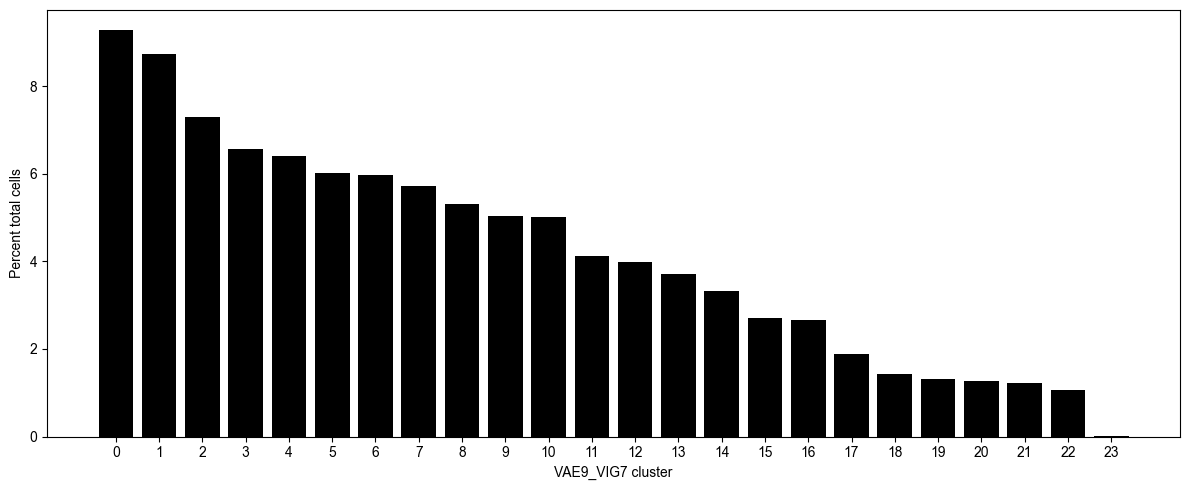

VAE9_VIG7
0     9.270755
1     8.734121
2     7.283479
3     6.557740
4     6.411841
5     6.015679
6     5.973934
7     5.708435
8     5.305178
9     5.030912
10    5.017763
11    4.113772
12    3.992085
13    3.709053
14    3.321867
15    2.715311
16    2.650397
17    1.895646
18    1.427683
19    1.308083
20    1.278235
21    1.213948
22    1.052394
23    0.011689
dtype: float64


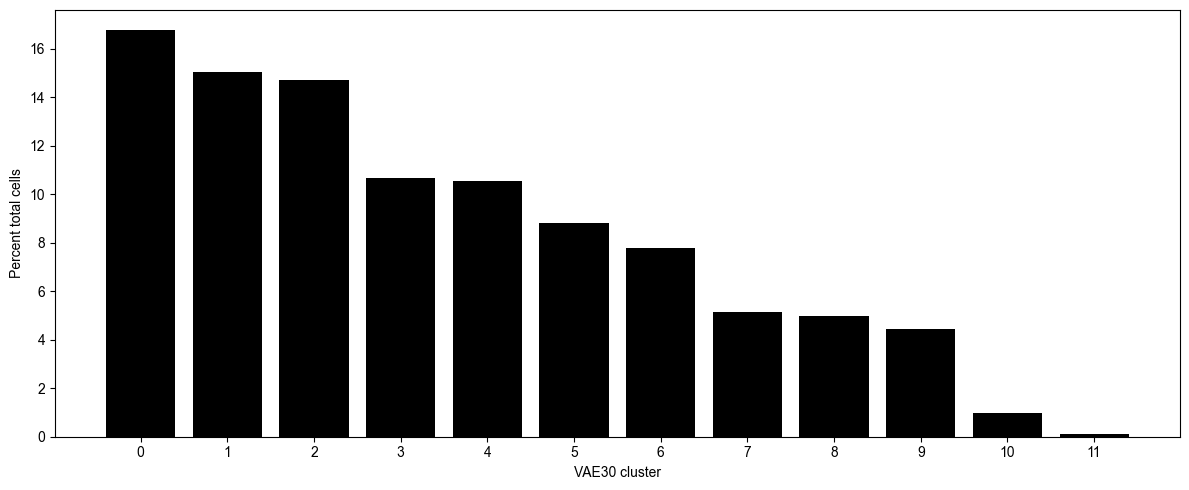

VAE30
0     16.766090
1     15.052244
2     14.731433
3     10.672556
4     10.532083
5      8.812185
6      7.794439
7      5.138615
8      4.974348
9      4.456082
10     0.967443
11     0.102484
dtype: float64


In [5]:
# VAE9 and VAE30 image patch cluster frequencies (after class balancing)
for clustering in ['VAE9_VIG7', 'VAE30']: 
    
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.bar(
        x=main.groupby(clustering).size().sort_values(ascending=False).index.astype('str'),
        height=(main.groupby(clustering).size().sort_values(ascending=False) / len(main)) * 100, color='k'
    )
    plt.xlabel(f'{clustering} cluster')
    plt.ylabel('Percent total cells')
    
    plt.tight_layout()
    plt.show()
    fig.savefig(os.path.join(out, f'{clustering}.pdf'))
    plt.close('all')
    
    cluster_freq = (main.groupby(clustering).size().sort_values(ascending=False)/main.groupby(clustering).size().sort_values(ascending=False).sum())*100
    print(cluster_freq)